In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("ulrikthygepedersen/online-retail-dataset")

# Finde die CSV-Datei im heruntergeladenen Ordner
dataset_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if dataset_files:
    file_path = os.path.join(path, dataset_files[0])  # Nimmt die erste gefundene CSV-Datei
    df = pd.read_csv(file_path)
    print("Dataset erfolgreich geladen!")
else:
    df = None
    print("Keine CSV-Datei im Dataset gefunden.")


Dataset erfolgreich geladen!


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


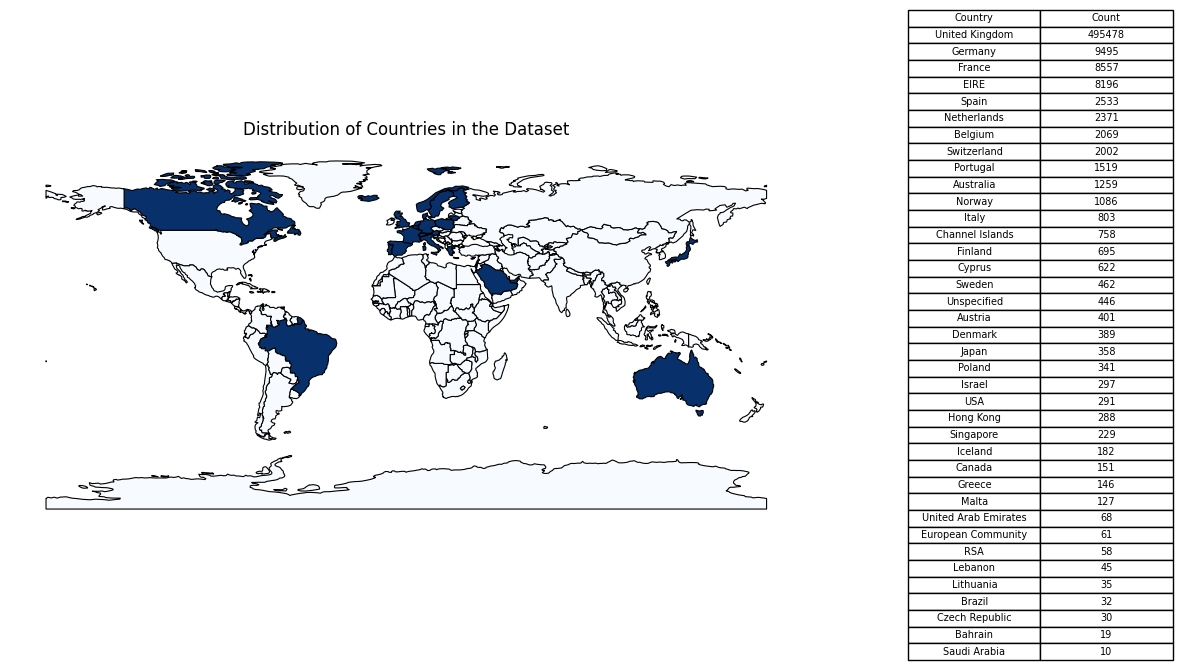

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Count how often each country appears in the dataset
country_counts = df['Country'].value_counts()

# Load the world map from Natural Earth dataset manually
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Map country occurrences to the world dataset
world['count'] = world['NAME'].map(country_counts).fillna(0)

# Set all nonzero occurrences to a fixed dark blue value
world['count'] = world['count'].apply(lambda x: 1 if x > 0 else 0)

# Create the plot with two subplots: one for the map, one for the country list
fig, ax = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 1]})

# Plot the world map with country occurrences in dark blue
world.plot(column='count', cmap='Blues', linewidth=0.8, edgecolor='black',
           legend=False, ax=ax[0])

ax[0].set_title("Distribution of Countries in the Dataset")
ax[0].axis("off")

# Display the country list with their respective counts
country_counts_df = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})
ax[1].axis("off")
ax[1].table(cellText=country_counts_df.values, colLabels=country_counts_df.columns, cellLoc='center', loc='center')

plt.show()

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop (columns=["CustomerID"], inplace=True)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [ ]:
# Create a new column 'OrderPrice' by multiplying 'UnitPrice' with 'Quantity'
df['OrderPrice'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,OrderPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
Country,object
OrderPrice,float64


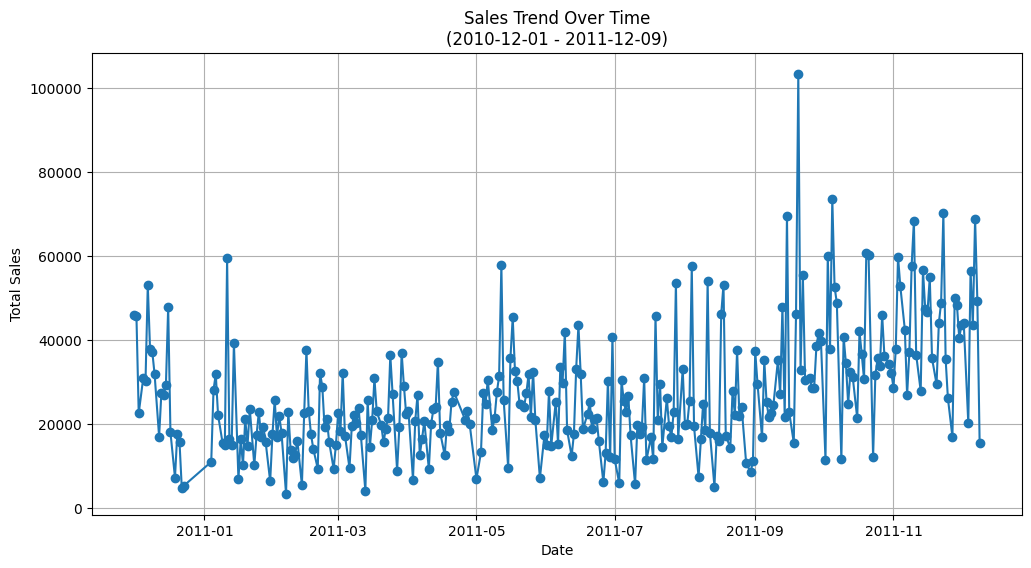

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the earliest and latest dates in the dataset
earliest_date = df['InvoiceDate'].min()
latest_date = df['InvoiceDate'].max()

# Group by date and sum the 'OrderPrice' to get total sales per time period
sales_over_time = df.groupby(df['InvoiceDate'].dt.to_period('D'))['OrderPrice'].sum()

# Convert the period index back to datetime for plotting
sales_over_time.index = sales_over_time.index.to_timestamp()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title(f"Sales Trend Over Time\n({earliest_date.date()} - {latest_date.date()})")
plt.grid(True)
plt.show()

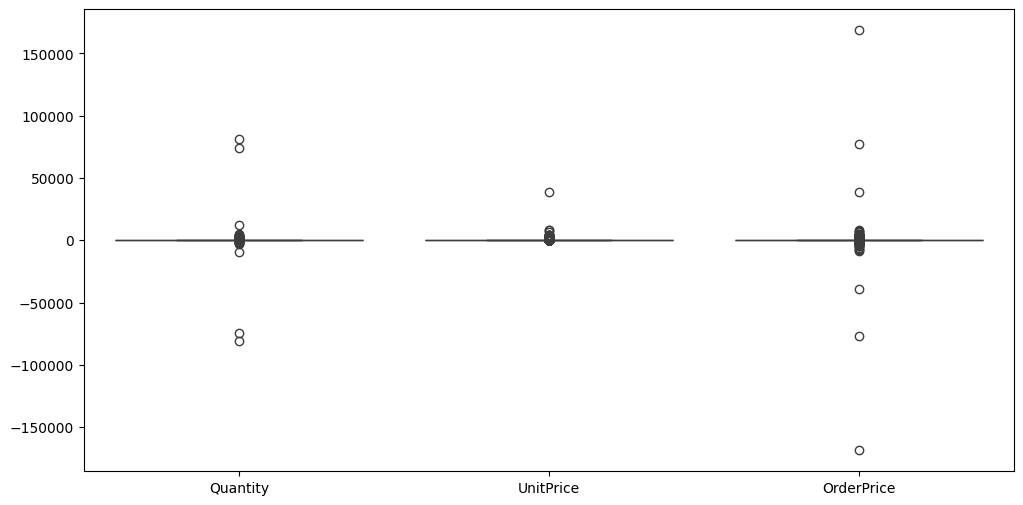

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Quantity', 'UnitPrice', 'OrderPrice']])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def remove_outliers(df, cols=['Quantity', 'UnitPrice', 'OrderPrice']):
    df_no_outlier = df.copy()
    for col in cols:
        s = df[col].dropna()
        if stats.shapiro(s)[1] > 0.05:
            z = np.abs(stats.zscore(s))
            df_no_outlier = df_no_outlier[z < 3]
            z_filtered = np.abs(stats.zscore(df_no_outlier[col].dropna()))
            df_no_outlier = df_no_outlier[z_filtered < 3]
        else:
            q1, q3 = df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            df_no_outlier = df_no_outlier[(df_no_outlier[col] >= lb) & (df_no_outlier[col] <= ub)]
    print("Outliers removed.")
    return df_no_outlier

In [ ]:
print(df_no_outlier.shape)
print(df.head())
print(df.describe())

(329579, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice         Country  OrderPrice  
0 2010-12-01 08:26:00       2.55  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39  United Kingdom       20.34  
            Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:0

In [ ]:
price_value = 0
filtered_row = df[df['OrderPrice'] <= price_value]
print(filtered_row)


       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice         Country  OrderPrice  
141    2010-12-01 09:41:00      27.50  Unit

In [ ]:
refunds = df[df['OrderPrice'] < 0]
print(refunds['Description'].value_counts().head(10))  # Zeigt die Top 10 rückerstatteten Produkte


Description
REGENCY CAKESTAND 3 TIER             180
Manual                               175
POSTAGE                               97
JAM MAKING SET WITH JARS              86
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      72
STRAWBERRY CERAMIC TRINKET BOX        54
ROSES REGENCY TEACUP AND SAUCER       53
RECIPE BOX PANTRY YELLOW DESIGN       47
JUMBO BAG RED RETROSPOT               44
Name: count, dtype: int64


<ipython-input-63-9e4cb29e5e64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refunds['InvoiceDate'] = pd.to_datetime(refunds['InvoiceDate'])


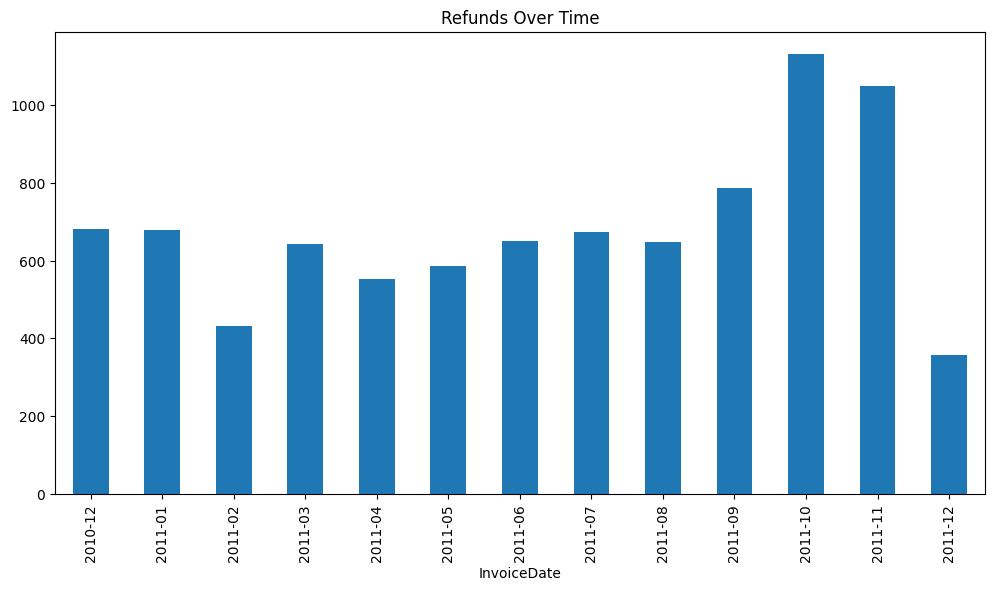

In [ ]:
refunds['InvoiceDate'] = pd.to_datetime(refunds['InvoiceDate'])
refunds_over_time = refunds.groupby(refunds['InvoiceDate'].dt.to_period('M'))['OrderPrice'].count()
refunds_over_time.plot(kind='bar', figsize=(12, 6), title="Refunds Over Time")
plt.show()


Anzahl der Rückerstattungen: 8872


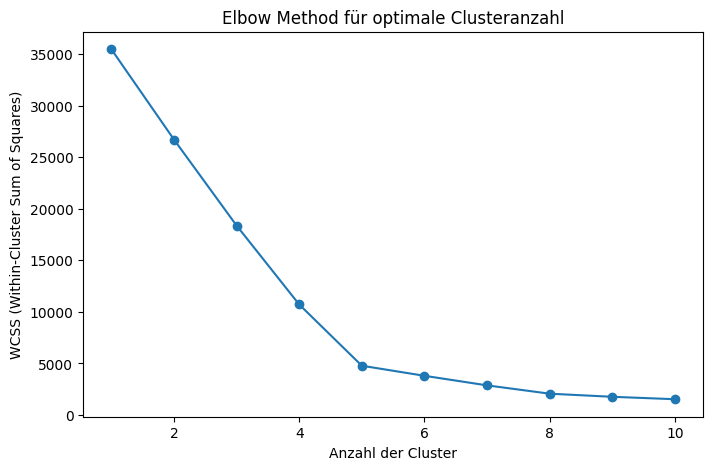

Anzahl der Rückerstattungen: 8872


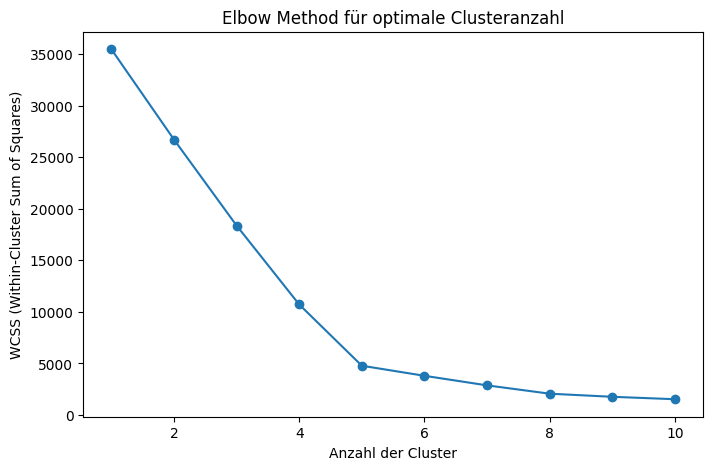

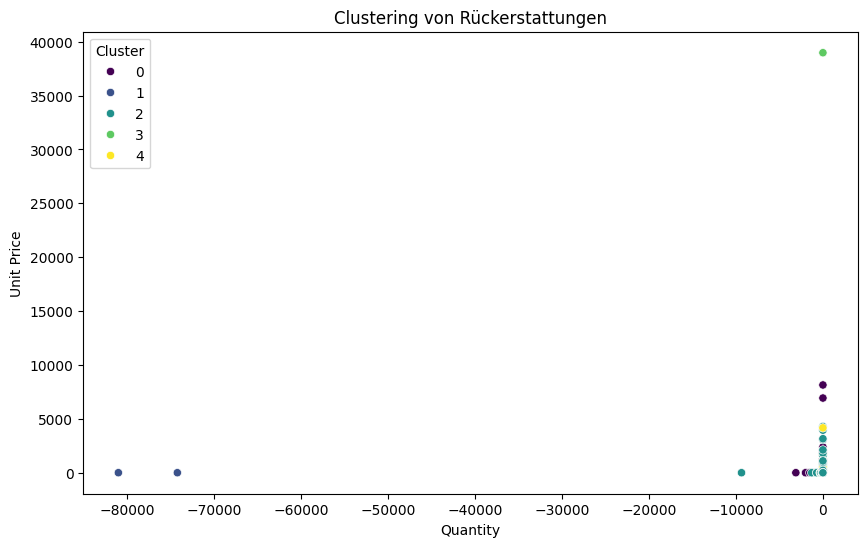

             Quantity     UnitPrice     OrderPrice   DayOfYear  CountryEncoded
Cluster                                                                       
0          -11.361702     15.702065     -35.824555   98.012286       26.881031
1       -77605.000000      1.560000 -122826.600000  180.500000       27.000000
2          -15.743949     13.025433     -36.797374  285.529744       26.902058
3           -1.000000  38970.000000  -38970.000000  161.000000       27.000000
4           -9.276328     16.849793     -37.658452  212.586859        9.063906


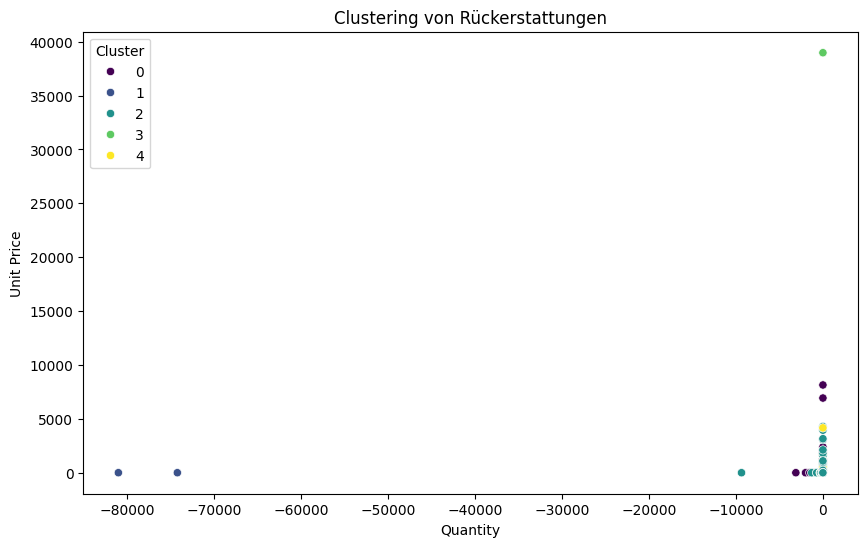

             Quantity     UnitPrice     OrderPrice   DayOfYear  CountryEncoded
Cluster                                                                       
0          -11.361702     15.702065     -35.824555   98.012286       26.881031
1       -77605.000000      1.560000 -122826.600000  180.500000       27.000000
2          -15.743949     13.025433     -36.797374  285.529744       26.902058
3           -1.000000  38970.000000  -38970.000000  161.000000       27.000000
4           -9.276328     16.849793     -37.658452  212.586859        9.063906


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Nur Rückerstattungen (OrderPrice < 0)
refunds = df[df['OrderPrice'] < 0].copy()

# Falls es zu wenige Rückerstattungen gibt, prüfe die Anzahl
print(f"Anzahl der Rückerstattungen: {len(refunds)}")

# Konvertiere Datum in numerisches Format (z. B. Tag im Jahr)
refunds['InvoiceDate'] = pd.to_datetime(refunds['InvoiceDate'])
refunds['DayOfYear'] = refunds['InvoiceDate'].dt.dayofyear

# Encodiere das Land als Zahl
le = LabelEncoder()
refunds['CountryEncoded'] = le.fit_transform(refunds['Country'])

# Wähle relevante Features für das Clustering
features = refunds[['UnitPrice', 'Quantity', 'DayOfYear', 'CountryEncoded']]

# Skaliere die Daten
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method zur Bestimmung der optimalen Cluster-Anzahl
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot für Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method für optimale Clusteranzahl')
plt.show()

# Wähle Cluster-Anzahl (z. B. k=3, wenn der Knick bei 3 liegt)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Nur Rückerstattungen (OrderPrice < 0)
refunds = df[df['OrderPrice'] < 0].copy()

# Falls es zu wenige Rückerstattungen gibt, prüfe die Anzahl
print(f"Anzahl der Rückerstattungen: {len(refunds)}")

# Konvertiere Datum in numerisches Format (z. B. Tag im Jahr)
refunds['InvoiceDate'] = pd.to_datetime(refunds['InvoiceDate'])
refunds['DayOfYear'] = refunds['InvoiceDate'].dt.dayofyear

# Encodiere das Land als Zahl
le = LabelEncoder()
refunds['CountryEncoded'] = le.fit_transform(refunds['Country'])

# Wähle relevante Features für das Clustering
features = refunds[['UnitPrice', 'Quantity', 'DayOfYear', 'CountryEncoded']]

# Skaliere die Daten
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method zur Bestimmung der optimalen Cluster-Anzahl
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot für Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method für optimale Clusteranzahl')
plt.show()

# Wähle Cluster-Anzahl (z. B. k=3, wenn der Knick bei 3 liegt)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
refunds['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualisiere Cluster (z. B. nach Preis und Menge)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=refunds, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Clustering von Rückerstattungen')
plt.show()

# Zeige Cluster-Statistiken, nur für numerische Spalten
# select_dtypes(include=np.number) wählt nur numerische Spalten aus
print(refunds.groupby('Cluster').agg({col: 'mean' for col in refunds.select_dtypes(include=np.number).columns if col != 'Cluster'}))
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

def cluster_refunds(df_no_outlier):
    """
    Clusters refund transactions (OrderPrice < 0) after outlier removal.

    Args:
        df_no_outlier (pd.DataFrame): DataFrame with outliers removed.
    """

    # Only refunds (OrderPrice < 0)
    refunds = df_no_outlier[df_no_outlier['OrderPrice'] < 0].copy()

    # Check the number of refunds in case there are too few
    print(f"Number of refunds: {len(refunds)}")

    if len(refunds) == 0:
        print("No refunds found after outlier removal. Clustering skipped.")
        return

    # Convert date to numerical format (e.g., day of year)
    refunds['InvoiceDate'] = pd.to_datetime(refunds['InvoiceDate'])
    refunds['DayOfYear'] = refunds['InvoiceDate'].dt.dayofyear

    # Encode the country as a number
    le = LabelEncoder()
    refunds['CountryEncoded'] = le.fit_transform(refunds['Country'])

    # Select relevant features for clustering
    features = refunds[['UnitPrice', 'Quantity', 'DayOfYear', 'CountryEncoded']]

    # Scale the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Elbow Method to determine the optimal number of clusters
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)

    # Plot for Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method for Optimal Cluster Number')
    plt.show()

    # Choose the number of clusters (e.g., k=3 if the elbow is at 3)
    k = 5
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    refunds['Cluster'] = kmeans.fit_predict(scaled_features)

    # Visualize clusters (e.g., by price and quantity)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=refunds, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis')
    plt.xlabel('Quantity')
    plt.ylabel('Unit Price')
    plt.title('Clustering of Refunds')
    plt.show()

    # Display cluster statistics, only for numerical columns
    print(refunds.groupby('Cluster').agg({col: 'mean' for col in refunds.select_dtypes(include=np.number).columns if col != 'Cluster'}))

# Example usage (assuming df_no_outlier is your DataFrame with outliers removed):
# cluster_refunds(df_no_outlier)led_features)

# Visualisiere Cluster (z. B. nach Preis und Menge)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=refunds, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Clustering von Rückerstattungen')
plt.show()



print(refunds.groupby('Cluster').agg({col: 'mean' for col in refunds.select_dtypes(include=np.number).columns if col != 'Cluster'}))

<ipython-input-66-7ced12bbd650>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YearMonth'] = df_filtered['InvoiceDate'].dt.to_period('M')


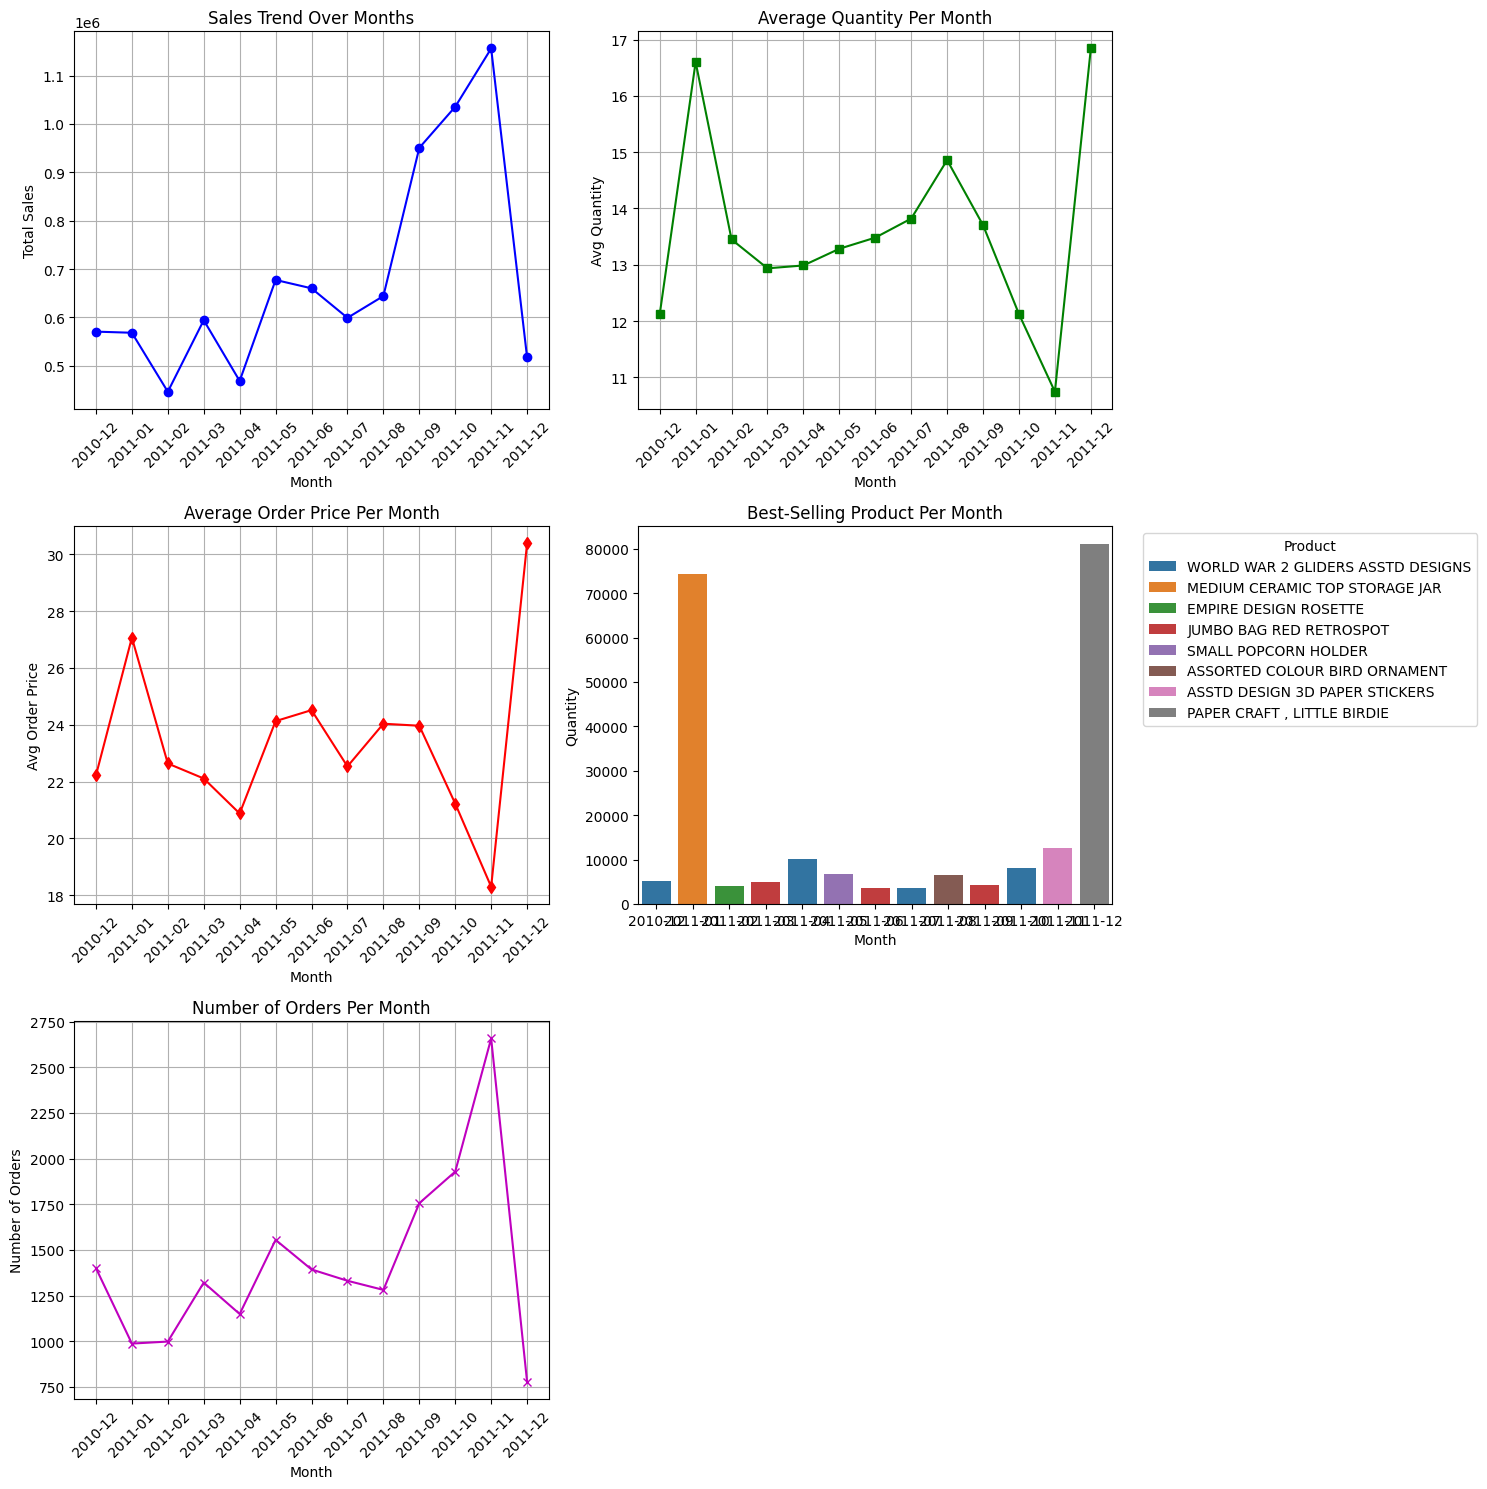

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is loaded

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_filtered = df[(df['OrderPrice'] >= 0) & (df['Quantity'] >= 0)]
df_filtered['YearMonth'] = df_filtered['InvoiceDate'].dt.to_period('M')

# Calculate orders per month
orders_per_month = df_filtered.groupby('YearMonth')['InvoiceNo'].nunique()

# Sales, avg quantity, avg price, and best-selling product per month
sales_per_month = df_filtered.groupby('YearMonth')['OrderPrice'].sum()
avg_quantity_per_month = df_filtered.groupby('YearMonth')['Quantity'].mean()
avg_order_price_per_month = df_filtered.groupby('YearMonth')['OrderPrice'].mean()
top_items_per_month = df_filtered.groupby(['YearMonth', 'Description'])['Quantity'].sum().reset_index()
top_items_per_month = top_items_per_month.loc[top_items_per_month.groupby('YearMonth')['Quantity'].idxmax()]

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Sales trend
axs[0, 0].plot(sales_per_month.index.astype(str), sales_per_month.values, marker='o', linestyle='-', color='b')
axs[0, 0].set_title("Sales Trend Over Months")
axs[0, 0].set_xlabel("Month")
axs[0, 0].set_ylabel("Total Sales")
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

# Average Quantity
axs[0, 1].plot(avg_quantity_per_month.index.astype(str), avg_quantity_per_month.values, marker='s', linestyle='-', color='g')
axs[0, 1].set_title("Average Quantity Per Month")
axs[0, 1].set_xlabel("Month")
axs[0, 1].set_ylabel("Avg Quantity")
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='x', rotation=45)

# Average Order Price
axs[1, 0].plot(avg_order_price_per_month.index.astype(str), avg_order_price_per_month.values, marker='d', linestyle='-', color='r')
axs[1, 0].set_title("Average Order Price Per Month")
axs[1, 0].set_xlabel("Month")
axs[1, 0].set_ylabel("Avg Order Price")
axs[1, 0].grid(True)
axs[1, 0].tick_params(axis='x', rotation=45)

# Best-Selling Product
sns.barplot(data=top_items_per_month, x='YearMonth', y='Quantity', hue='Description', ax=axs[1, 1])
axs[1, 1].set_title("Best-Selling Product Per Month")
axs[1, 1].set_xlabel("Month")
axs[1, 1].set_ylabel("Quantity")
axs[1, 1].legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')

# Orders per Month
axs[2, 0].plot(orders_per_month.index.astype(str), orders_per_month.values, marker='x', linestyle='-', color='m')
axs[2, 0].set_title("Number of Orders Per Month")
axs[2, 0].set_xlabel("Month")
axs[2, 0].set_ylabel("Number of Orders")
axs[2, 0].grid(True)
axs[2, 0].tick_params(axis='x', rotation=45)

#Remove empty plot
fig.delaxes(axs[2,1])

plt.tight_layout()
plt.show()